In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
file_path = Path("data/myopia.csv")
df = pd.read_csv(file_path)
df.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [4]:
df["MYOPIC"].value_counts(normalize=True)

0    0.868932
1    0.131068
Name: MYOPIC, dtype: float64

In [5]:
label = df["MYOPIC"]
X = df.iloc[:,:-1].copy()
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [7]:
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [11]:
# Initialize PCA model preserving 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.90)

# Get principal components for the data
data_pca = pca.fit_transform(df)
print(data_pca[0:5])

[[ 12.13857076  31.63172377  -4.52717133]
 [-15.26843626  -6.09505495   1.20715737]
 [-11.6623217    3.75565363   2.80825607]
 [ 11.23642131   4.00837634  -8.17999839]
 [-22.44658654   4.58139932  -1.8174651 ]]


In [14]:
tsne = TSNE(learning_rate=300)

In [17]:
tsne_dims = tsne.fit_transform(data_pca)

In [18]:
tsne_dims.shape

(618, 2)

In [19]:
# The first column of transformed features
X = tsne_dims[:,0]

# The second column of transformed features
y = tsne_dims[:,1]

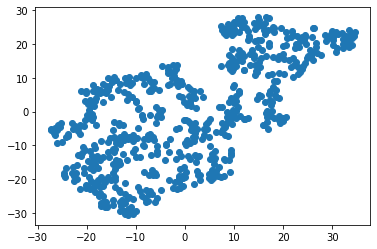

In [20]:
plt.scatter(X, y)
plt.show()

C:\Users\jyesu_000\anaconda3\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


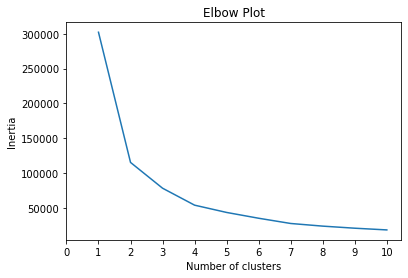

In [21]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_dims)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Recommendation

The unsupervised learning model displays that two maybe three clusters exist in the data provided. This finding is based on the analysis of the K-means. I would recommend more analysis needs to be done on the data to see if the clusters that have been produced are justified, maybe even add back in the MYOPIC category to see if that gives a better understanding of the data.